In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/home/diablo/Desktop/IIIT_Program/Module2 - Main EDA /Univariate Analysis/tendulkar_ODI.csv")

# Basic Data Analysis

In [3]:
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  295 non-null    int64 
 1   Runs        295 non-null    object
 2   Mins        295 non-null    object
 3   BF          295 non-null    object
 4   4s          295 non-null    object
 5   6s          295 non-null    object
 6   SR          295 non-null    object
 7   Pos         295 non-null    object
 8   Dismissal   295 non-null    object
 9   Inns        295 non-null    object
 10  Opposition  295 non-null    object
 11  Ground      295 non-null    object
 12  Start Date  295 non-null    object
dtypes: int64(1), object(12)
memory usage: 30.1+ KB


# Data Cleaning 

In [7]:
df.isnull().sum()

Unnamed: 0    0
Runs          0
Mins          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [11]:
df.Runs.describe()

count     295
unique    118
top         1
freq       16
Name: Runs, dtype: object

In [12]:
df.Runs.info()

<class 'pandas.core.series.Series'>
RangeIndex: 295 entries, 0 to 294
Series name: Runs
Non-Null Count  Dtype 
--------------  ----- 
295 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB


In [13]:
df.Runs.value_counts()

Runs
1       16
2       14
0       12
4        9
21       8
        ..
175      1
96*      1
200*     1
111      1
85       1
Name: count, Length: 118, dtype: int64

#### r'\d+\*' is the regular-expression pattern:

- \d+ matches one or more digits.

- \* (the asterisk is escaped with a backslash) matches a literal *, because in regex * is normally a quantifier.

- The leading " <b>r</b> " makes it a <b>raw string</b>, so backslashes are interpreted by the regex engine, not by Python.


In [24]:
df[df["Runs"].str.contains(r'\d+\*')].shape

(20, 13)

In [25]:
df[df["Runs"]=="DNB"].shape

(2, 13)

In [66]:
df.shape

(295, 13)

In [81]:
df1=df.drop(df[df["Runs"]=="DNB"].index)

In [82]:
df1.shape

(293, 13)

In [83]:
df1.drop(df[df["Runs"].str.contains(r'\d+\*')].index, inplace=True)

In [84]:
df1.shape

(273, 13)

In [85]:
df1.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [86]:
df1[df1["4s"]=="-"]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
233,234,TDNB,-,-,-,-,-,-,-,-,v Sri Lanka,Kolkata,8-Feb-07


In [87]:
df1.drop(df1[df1["4s"]=="-"].index, inplace=True)

In [88]:
df1.shape

(272, 13)

In [89]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 294
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  272 non-null    int64 
 1   Runs        272 non-null    object
 2   Mins        272 non-null    object
 3   BF          272 non-null    object
 4   4s          272 non-null    object
 5   6s          272 non-null    object
 6   SR          272 non-null    object
 7   Pos         272 non-null    object
 8   Dismissal   272 non-null    object
 9   Inns        272 non-null    object
 10  Opposition  272 non-null    object
 11  Ground      272 non-null    object
 12  Start Date  272 non-null    object
dtypes: int64(1), object(12)
memory usage: 29.8+ KB


In [90]:
df1["Runs"]=df1["Runs"].astype(float)

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 294
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  272 non-null    int64  
 1   Runs        272 non-null    float64
 2   Mins        272 non-null    object 
 3   BF          272 non-null    object 
 4   4s          272 non-null    object 
 5   6s          272 non-null    object 
 6   SR          272 non-null    object 
 7   Pos         272 non-null    object 
 8   Dismissal   272 non-null    object 
 9   Inns        272 non-null    object 
 10  Opposition  272 non-null    object 
 11  Ground      272 non-null    object 
 12  Start Date  272 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 29.8+ KB


In [92]:
df1["4s"]=df1["4s"].astype(float)

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 294
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  272 non-null    int64  
 1   Runs        272 non-null    float64
 2   Mins        272 non-null    object 
 3   BF          272 non-null    object 
 4   4s          272 non-null    float64
 5   6s          272 non-null    object 
 6   SR          272 non-null    object 
 7   Pos         272 non-null    object 
 8   Dismissal   272 non-null    object 
 9   Inns        272 non-null    object 
 10  Opposition  272 non-null    object 
 11  Ground      272 non-null    object 
 12  Start Date  272 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 29.8+ KB


In [95]:
df1.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0.0,-,2,0.0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0.0,2,2,0.0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36.0,51,39,5.0,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19.0,38,35,1.0,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31.0,31,26,3.0,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


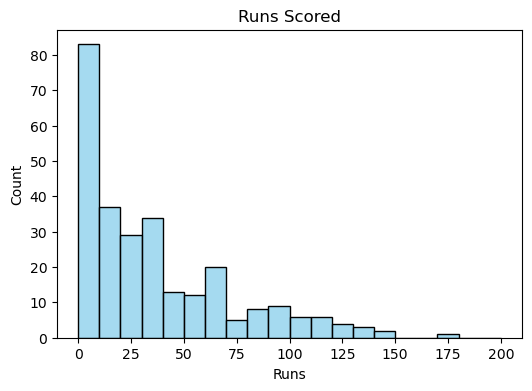

In [104]:
plt.figure(figsize=(6, 4))                # size in inches
sns.histplot(data=df1, x=df1["Runs"] , color="skyblue", bins=np.arange(0, 200 + 10, 10))
plt.title("Runs Scored")
plt.xlabel("Runs")
plt.ylabel("Count")
plt.show()

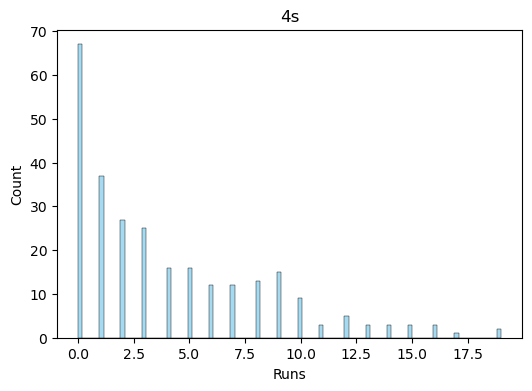

In [116]:
plt.figure(figsize=(6, 4))                # size in inches
sns.histplot(data=df1, x=df1["4s"] , color="skyblue", bins= 100)
plt.title("4s")
plt.xlabel("Runs")
plt.ylabel("Count")
plt.show()